<a href="https://colab.research.google.com/github/WHARN0/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

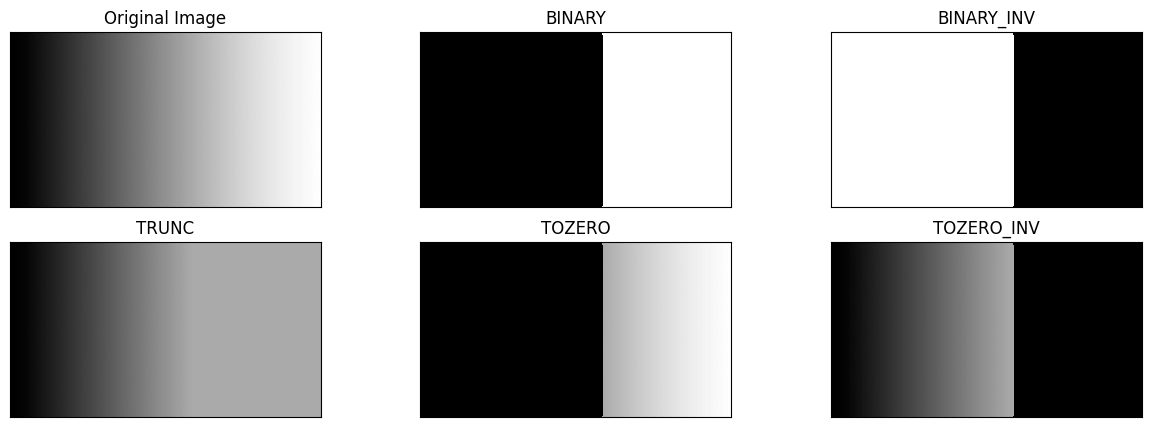

In [5]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')

img = cv.imread(filename)

thresh = 170

def manual_threshold(image, thresh, max_value, method):
    result = np.zeros_like(image)

    if method == 'binary':
        result[image > thresh] = max_value
    elif method == 'binary_inv':
        result[image <= thresh] = max_value
    elif method == 'truncate':
        result = np.minimum(image, thresh)
    elif method == 'tozero':
        result[image > thresh] = image[image > thresh]
    elif method == 'tozero_inv':
        result[image <= thresh] = image[image <= thresh]

    return result

thresh1 = manual_threshold(img, thresh, 255, 'binary')
thresh2 = manual_threshold(img, thresh, 255, 'binary_inv')
thresh3 = manual_threshold(img, thresh, 255, 'truncate')
thresh4 = manual_threshold(img, thresh, 255, 'tozero')
thresh5 = manual_threshold(img, thresh, 255, 'tozero_inv')

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

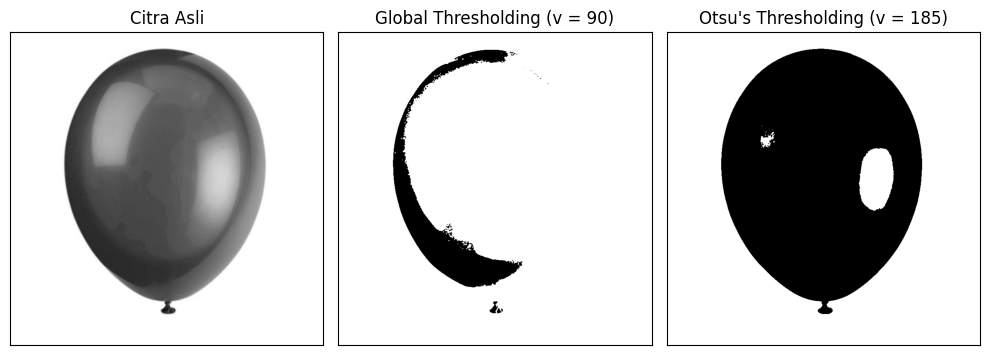

In [6]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/balloon.jpg')

img = cv.imread(filename,0)

def manual_gaussian_blur(image, kernel_size=(5,5), sigma=0):
    kernel_x = cv.getGaussianKernel(kernel_size[0], sigma)
    kernel_y = cv.getGaussianKernel(kernel_size[1], sigma)
    kernel = kernel_x * kernel_y.T
    return cv.filter2D(image, -1, kernel)

def manual_threshold(image, thresh):
    result = np.zeros_like(image)
    result[image > thresh] = 255
    return result

def otsu_threshold(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    total = image.shape[0] * image.shape[1]

    current_max, threshold = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    weightB, weightF = 0, 0

    for i in range(0, 256):
        sumT += i * hist[i]

    for i in range(0, 256):
        weightB += hist[i]
        if weightB == 0:
            continue

        weightF = total - weightB
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB
        meanF = (sumT - sumB) / weightF

        varBetween = weightB * weightF * (meanB - meanF) ** 2

        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    result = manual_threshold(image, threshold)
    return result, threshold

blur = manual_gaussian_blur(img, (5, 5), 0)

thresh = 90
th1 = manual_threshold(blur, thresh)

th2, ret2 = otsu_threshold(blur)

x = "Otsu's Thresholding (v = " + str(ret2) + ")"

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(10, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  
  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

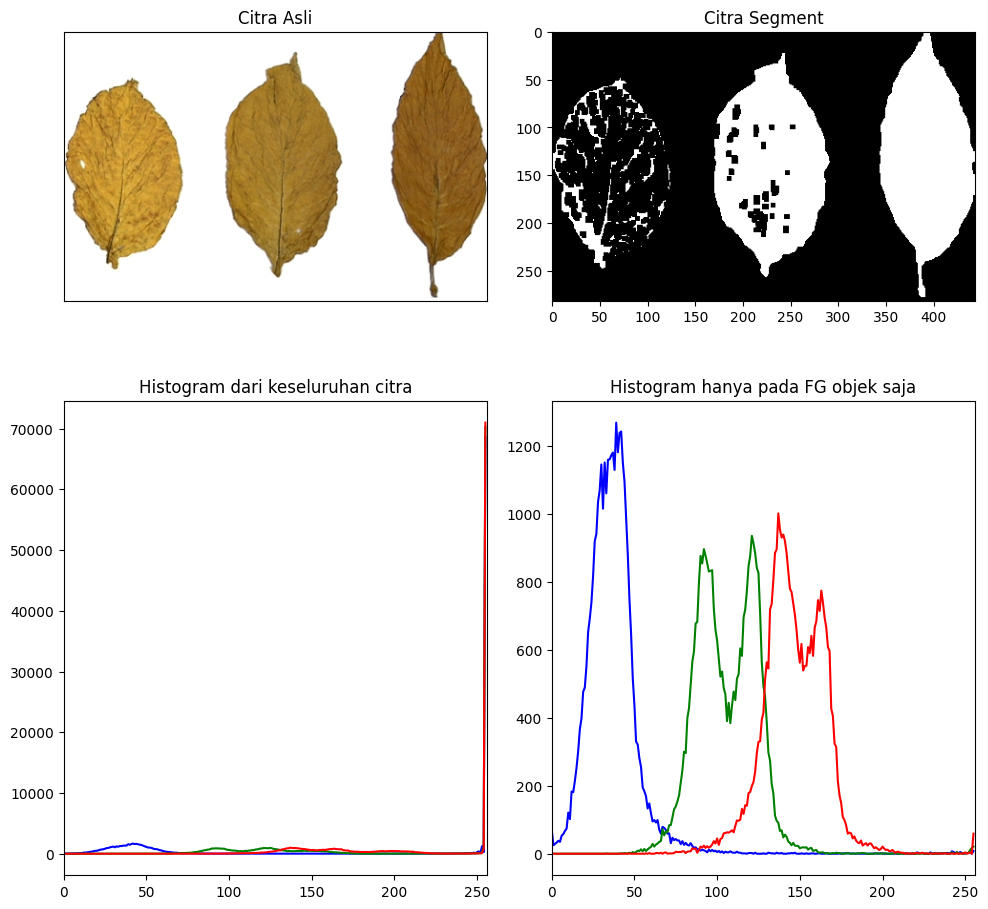

In [8]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/tobacco.jpg')

gray = cv.cvtColor(img.copy(), cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, np.ones((5,5),np.uint8))

masked_img = cv.bitwise_and(img, img, mask=thresh)

color = ('b', 'g', 'r')
plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(thresh, cmap='gray')
plt.title('Citra Segment')

plt.subplot(223)
for i, col in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title('Histogram dari keseluruhan citra')

plt.subplot(224)
for i, col in enumerate(color):
    hist_fg = cv.calcHist([img], [i], thresh, [256], [0,256])
    plt.plot(hist_fg, color=col)
    plt.xlim([0,256])
plt.title('Histogram hanya pada FG objek saja')

plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

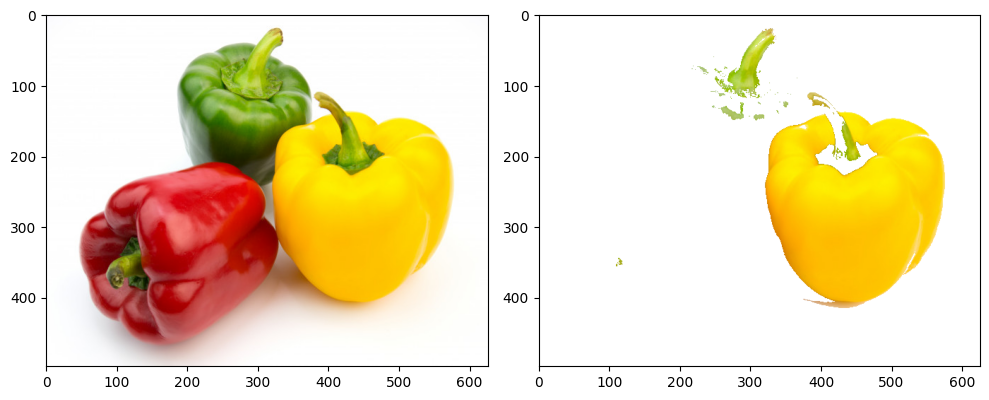

In [12]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')

Z = img.reshape((-1, 3))
Z = np.float32(Z)

K = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

lower_yellow = np.array([0, 180, 180])
upper_yellow = np.array([50, 255, 255])

mask = cv.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv.bitwise_and(img, img, mask=mask)

result = img.copy()
result[mask == 0] = [255]

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

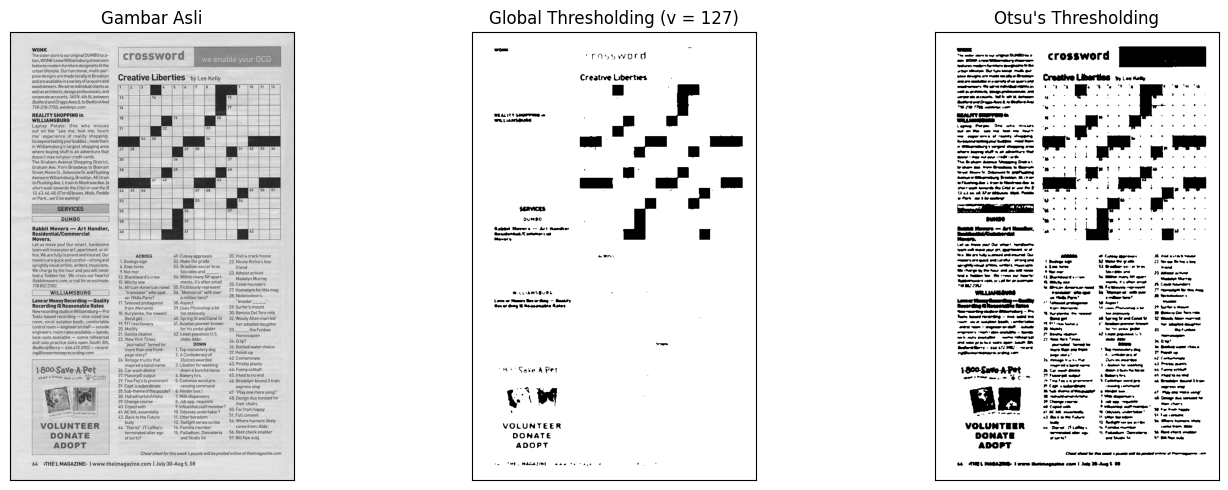

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [11]:
filename = '/content/drive/MyDrive/PCVK_MM/Images/crossword.jpg'
img = cv.imread(filename, 0)

blur = cv.GaussianBlur(img, (5, 5), 0)

thresh_value = 127
ret1, th1 = cv.threshold(blur, thresh_value, 255, cv.THRESH_BINARY)

ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")